In [14]:
# load python packages
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import IPython
import sklearn
import keras

In [15]:
# load dataset
import scipy.io          
dataset = scipy.io.loadmat('/Users/criell/dataset.mat')

In [16]:
# get training and testing sets
x_train = dataset['train_image']
x_test = dataset['test_image']
y_train = dataset['train_label']
y_test = dataset['test_label']

In [17]:
# print package version 
print('numpy:', np.__version__)
print('scipy:', sp.__version__)
print('matplotlib:', matplotlib.__version__)
print('iPython:', IPython.__version__)
print('scikit-learn:', sklearn.__version__)
print('keras: ', keras.__version__)
import tensorflow as tf
print('Tensorflow: ', tf.__version__)

numpy: 1.12.1
scipy: 1.0.0
matplotlib: 2.1.2
iPython: 6.2.1
scikit-learn: 0.19.1
keras:  2.1.5
Tensorflow:  1.1.0


In [18]:
# import keras packages
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import backend as K

In [19]:
# batch size for gradient descent
batch_size = 32
# number of classes
num_classes = 2
# number of epochs (1 epoch = amount of iterations that covers the whole training set)
epochs = 200 # try a larger number of epochs here (for example 10 or larger)
# input image dimensions
nmb_samples, img_rows, img_cols = x_train.shape[0], x_train.shape[1], x_train.shape[2]
nmb_test_samples = x_test.shape[0]

In [20]:
# adjust training image format
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

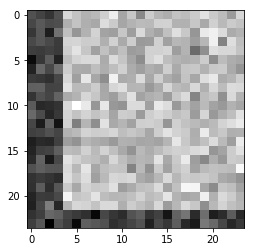

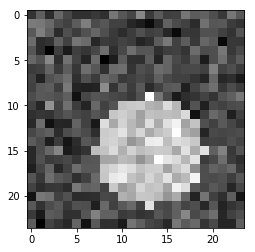

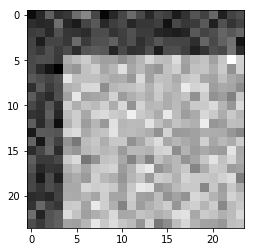

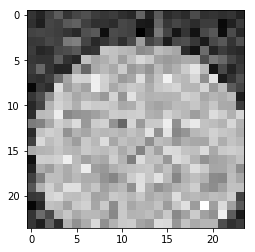

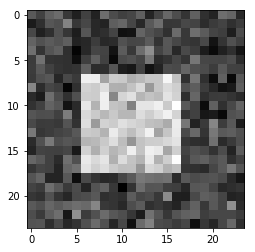

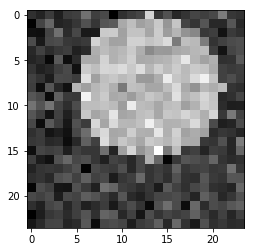

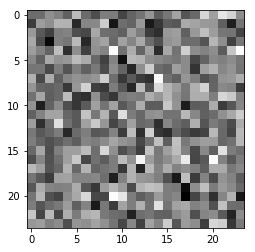

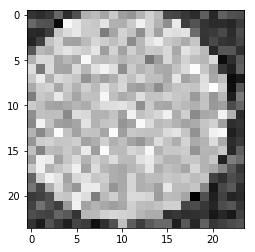

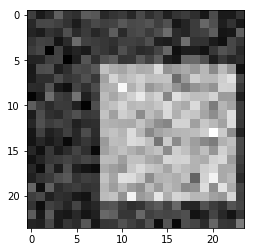

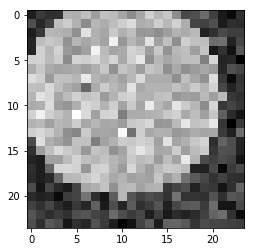

In [21]:
# display some training images
for i in range(10):
    first_image = x_train[i,:,:,0]
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((img_rows, img_cols))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [22]:
# type casting and dimensionality transformations
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.reshape(nmb_samples, img_rows*img_cols)
x_test = x_test.reshape(nmb_test_samples, img_rows*img_cols)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (200, 576)
200 train samples
200 test samples


In [23]:
# convert class vectors to binary class matrices (one hot vectors)
y_train = keras.utils.to_categorical(np.squeeze(y_train), num_classes)
y_test = keras.utils.to_categorical(np.squeeze(y_test), num_classes)

In [24]:
# define MLP model (2 hidden layers with 512 nodes, activated by ReLUs)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(img_rows*img_cols,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [25]:
# compile model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [26]:
# training
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))

Train on 200 samples, validate on 200 samples
Epoch 1/200
200/200 [==============================] - 0s 2ms/step - loss: 1.1149 - acc: 0.4600 - val_loss: 0.7411 - val_acc: 0.5000
Epoch 2/200
200/200 [==============================] - 0s 698us/step - loss: 0.6881 - acc: 0.5750 - val_loss: 0.8107 - val_acc: 0.5000
Epoch 3/200
200/200 [==============================] - 0s 812us/step - loss: 0.6985 - acc: 0.5050 - val_loss: 0.7678 - val_acc: 0.5000
Epoch 4/200
200/200 [==============================] - 0s 768us/step - loss: 0.6335 - acc: 0.6350 - val_loss: 0.6582 - val_acc: 0.6150
Epoch 5/200
200/200 [==============================] - 0s 838us/step - loss: 0.6241 - acc: 0.6550 - val_loss: 1.0066 - val_acc: 0.5000
Epoch 6/200
200/200 [==============================] - 0s 726us/step - loss: 0.6922 - acc: 0.6650 - val_loss: 0.6889 - val_acc: 0.5250
Epoch 7/200
200/200 [==============================] - 0s 726us/step - loss: 0.6347 - acc: 0.6150 - val_loss: 0.5959 - val_acc: 0.6850
Epoch 8/200

In [27]:
# print train and test losses and classification accuracies
score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train loss: 6.43489355571e-05
Train accuracy: 1.0
Test loss: 0.442377970815
Test accuracy: 0.87


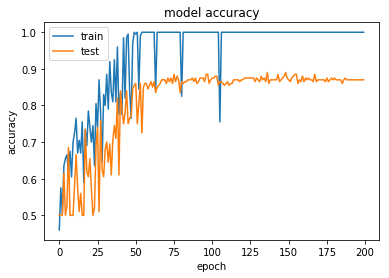

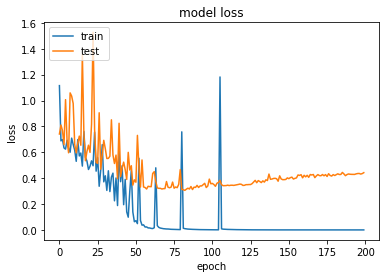

In [28]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()